<a href="https://colab.research.google.com/github/monicagokul1812/Online-food-delivery/blob/main/online_food_delivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy matplotlib seaborn sqlalchemy pymysql


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 1.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("raw _online food delivery.csv")
# for information
df.shape


(100000, 25)

In [ ]:
df.head()


,Order_ID,Customer_ID,Customer_Age,Customer_Gender,City,Area,Restaurant_ID,Restaurant_Name,Cuisine_Type,Order_Date,...,Final_Amount,Payment_Mode,Order_Status,Cancellation_Reason,Delivery_Partner_ID,Delivery_Rating,Restaurant_Rating,Order_Day,Peak_Hour,Profit_Margin
0,ORD000001,CUST6948,19.0,Male,NaN,Central,RES936,Restaurant_29,Chinese,10/20/2024,...,NaN,UPI,Delivered,NaN,DP563,5.0,4.4,Weekend,True,0.13
1,ORD000002,CUST6515,NaN,Female,Chennai,North,RES689,Restaurant_419,Chinese,8/12/2024,...,4849.0,COD,Delivered,NaN,DP369,5.0,4.7,Weekday,True,0.48
2,ORD000003,CUST1765,NaN,Male,Delhi,NaN,RES723,Restaurant_244,Arabian,12/8/2024,...,737.0,Wallet,Delivered,NaN,DP580,4.0,4.9,Weekend,True,0.08
3,ORD000004,CUST2744,NaN,Male,Mumbai,Central,RES951,Restaurant_178,Chinese,10/8/2024,...,NaN,UPI,Cancelled,Late Delivery,DP155,2.0,3.4,Weekday,NaN,0.04
4,ORD000005,CUST4389,57.0,Female,Chennai,South,RES419,Restaurant_262,Chinese,2/4/2024,...,352.0,Card,Delivered,NaN,DP728,2.0,4.4,Weekend,False,0.12


In [ ]:
df.tail()

,Order_ID,Customer_ID,Customer_Age,Customer_Gender,City,Area,Restaurant_ID,Restaurant_Name,Cuisine_Type,Order_Date,...,Final_Amount,Payment_Mode,Order_Status,Cancellation_Reason,Delivery_Partner_ID,Delivery_Rating,Restaurant_Rating,Order_Day,Peak_Hour,Profit_Margin
99995,ORD099996,CUST3722,NaN,NaN,Mumbai,NaN,RES295,Restaurant_500,Arabian,6/10/2024,...,132.0,Card,Delivered,NaN,DP835,2.0,4.0,Weekday,True,0.17
99996,ORD099997,CUST6158,NaN,Male,Mumbai,East,RES157,Restaurant_458,Arabian,4/22/2024,...,1078.0,NaN,Delivered,NaN,DP476,4.0,3.5,Weekday,False,-0.15
99997,ORD099998,CUST2155,NaN,NaN,Delhi,East,RES287,Restaurant_273,NaN,2/23/2024,...,NaN,COD,Cancelled,NaN,DP577,2.0,4.0,Weekday,True,0.47
99998,ORD099999,CUST3015,NaN,Female,Delhi,North,RES491,Restaurant_241,NaN,12/10/2024,...,NaN,NaN,Delivered,NaN,DP896,NaN,4.3,Weekday,NaN,0.44
99999,ORD100000,CUST7959,NaN,Other,Hyderabad,East,RES680,Restaurant_237,Chinese,NaN,...,NaN,Wallet,Cancelled,NaN,DP908,5.0,4.2,Weekday,False,0.20


In [ ]:
#data understanding
df.columns

Index(['Order_ID', 'Customer_ID', 'Customer_Age', 'Customer_Gender', 'City',
       'Area', 'Restaurant_ID', 'Restaurant_Name', 'Cuisine_Type',
       'Order_Date', 'Order_Time', 'Delivery_Time_Min', 'Distance_km',
       'Order_Value', 'Discount_Applied', 'Final_Amount', 'Payment_Mode',
       'Order_Status', 'Cancellation_Reason', 'Delivery_Partner_ID',
       'Delivery_Rating', 'Restaurant_Rating', 'Order_Day', 'Peak_Hour',
       'Profit_Margin'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Order_ID             100000 non-null  object 
 1   Customer_ID          100000 non-null  object 
 2   Customer_Age         49907 non-null   float64
 3   Customer_Gender      75144 non-null   object 
 4   City                 83274 non-null   object 
 5   Area                 83315 non-null   object 
 6   Restaurant_ID        100000 non-null  object 
 7   Restaurant_Name      100000 non-null  object 
 8   Cuisine_Type         83115 non-null   object 
 9   Order_Date           98986 non-null   object 
 10  Order_Time           98002 non-null   object 
 11  Delivery_Time_Min    66641 non-null   float64
 12  Distance_km          66530 non-null   float64
 13  Order_Value          66673 non-null   float64
 14  Discount_Applied     83285 non-null   float64
 15  Final_Amount      

In [ ]:
# it will help to detect outliers
df.describe()


,Customer_Age,Delivery_Time_Min,Distance_km,Order_Value,Discount_Applied,Final_Amount,Delivery_Rating,Restaurant_Rating,Profit_Margin
count,49907.000000,66641.000000,66530.000000,66673.000000,83285.000000,44303.000000,83477.000000,100000.000000,100000.000000
mean,38.976516,127.475923,16.449242,2081.830126,93.936243,1961.101190,2.991531,4.249680,0.150362
std,12.372157,90.805839,12.256742,1553.628891,108.209904,1557.354417,1.414108,0.722554,0.201888
min,18.000000,20.000000,1.000000,150.000000,0.000000,-150.000000,1.000000,3.000000,-0.200000
25%,28.000000,45.000000,5.470000,673.000000,20.000000,559.000000,2.000000,3.600000,-0.020000
50%,39.000000,120.000000,9.970000,1197.000000,50.000000,1156.000000,3.000000,4.200000,0.150000
75%,50.000000,210.000000,27.430000,3494.000000,100.000000,3375.000000,4.000000,4.900000,0.320000
max,60.000000,300.000000,40.000000,5000.000000,300.000000,4980.000000,5.000000,5.500000,0.500000


In [ ]:
# its helps to detect spelling mistake
df['City'].value_counts()



,count
City,
Hyderabad,16884
Bangalore,16732
Delhi,16695
Mumbai,16493
Chennai,16470


In [ ]:
df['Order_Status'].value_counts()

,count
Order_Status,
Delivered,84964
Cancelled,15036


In [ ]:
#check Missing values
df.isnull().sum()


,0
Order_ID,0
Customer_ID,0
Customer_Age,50093
Customer_Gender,24856
City,16726
Area,16685
Restaurant_ID,0
Restaurant_Name,0
Cuisine_Type,16885
Order_Date,1014


In [ ]:
df['Delivery_Time_Min'] = df['Delivery_Time_Min'].fillna(df['Delivery_Time_Min'].median())

df['Order_Value'] = df['Order_Value'].fillna(df['Order_Value'].mean())
df['Customer_Age'] = df['Customer_Age'].fillna(df['Customer_Age'].median())
df['Customer_Gender'] = df['Customer_Gender'].fillna(df['Customer_Gender'].mode()[0])
df['City'] = df['City'].fillna(df['City'].mode()[0])
df['Area'] = df['Area'].fillna(df['Area'].mode()[0])
df['Cuisine_Type'] = df['Cuisine_Type'].fillna(df['Cuisine_Type'].mode()[0])
df['Distance_km'] = df['Distance_km'].fillna(df['Distance_km'].median())
df['Discount_Applied'] = df['Discount_Applied'].fillna(0)
df['Final_Amount'] = df['Final_Amount'].fillna(df['Order_Value'] - df['Discount_Applied'])
df['Profit_Margin'] = df['Profit_Margin'].fillna(df['Profit_Margin'].median())
df['Payment_Mode'] = df['Payment_Mode'].fillna(df['Payment_Mode'].mode()[0])
df['Order_Status'] = df['Order_Status'].fillna(df['Order_Status'].mode()[0])
df.loc[(df['Order_Status'] != 'Cancelled'),'Cancellation_Reason'] = 'Not Applicable'
df['Delivery_Rating'] = df['Delivery_Rating'].fillna(df['Delivery_Rating'].median())
df['Restaurant_Rating'] = df['Restaurant_Rating'].fillna(df['Restaurant_Rating'].median())
df['Profit_Margin'] = df['Profit_Margin'].fillna(df['Profit_Margin'].median())
df['Cancellation_Reason'] = df['Cancellation_Reason'].fillna('Not Applicable')
df['Restaurant_Name'] = df['Restaurant_Name'].fillna(df['Restaurant_Name'].mode()[0])
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Customer_ID'] = df['Customer_ID'].astype(str)
df.isnull().sum()


,0
Order_ID,0
Customer_ID,0
Customer_Age,0
Customer_Gender,0
City,0
Area,0
Restaurant_ID,0
Restaurant_Name,0
Cuisine_Type,0
Order_Date,1014


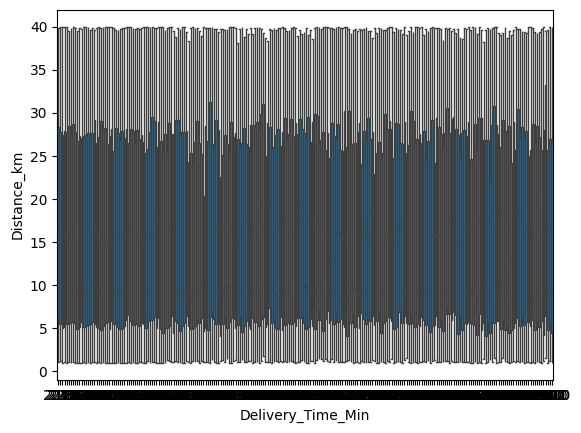

In [ ]:
sns.boxplot(x=df['Delivery_Time_Min'],y=df['Distance_km'])
plt.show()


In [ ]:
upper_limit = df['Delivery_Time_Min'].quantile(0.99)
df['Delivery_Time_Min'] = np.where(df['Delivery_Time_Min'] > upper_limit,upper_limit,df['Delivery_Time_Min'])
ov_upper = df['Order_Value'].quantile(0.99)
df['Order_Value'] = np.where(df['Order_Value'] > ov_upper,ov_upper,df['Order_Value'])
df.loc[df['Restaurant_Rating'] > 5, 'Restaurant_Rating'] = 5
df.loc[df['Delivery_Rating'] > 5, 'Delivery_Rating'] = 5
df.loc[df['Profit_Margin'] < 0, 'Profit_Margin'] = 0

cat_cols = [
    'Customer_Gender',
    'City',
    'Area',
    'Cuisine_Type',
    'Payment_Mode',
    'Order_Status'
]

for col in cat_cols:
    df[col] = df[col].str.strip().str.lower()



df.loc[df['Order_Status'] == 'Cancelled', 'Delivery_Rating'] = np.nan
df.loc[df['Order_Status'] == 'Cancelled', 'Restaurant_Rating'] = np.nan

df.loc[
    df['Order_Status'] != 'cancelled',
    'Cancellation_Reason'
] = 'not applicable'

df.isnull().sum()
#I handled missing values using statistical methods based on data distribution,
#capped outliers using quantiles, corrected invalid ratings and profit values,
#standardized categorical text, and enforced business logic consistency for cancelled orders.

,0
Order_ID,0
Customer_ID,0
Customer_Age,50093
Customer_Gender,24856
City,16726
Area,16685
Restaurant_ID,0
Restaurant_Name,0
Cuisine_Type,16885
Order_Date,1014


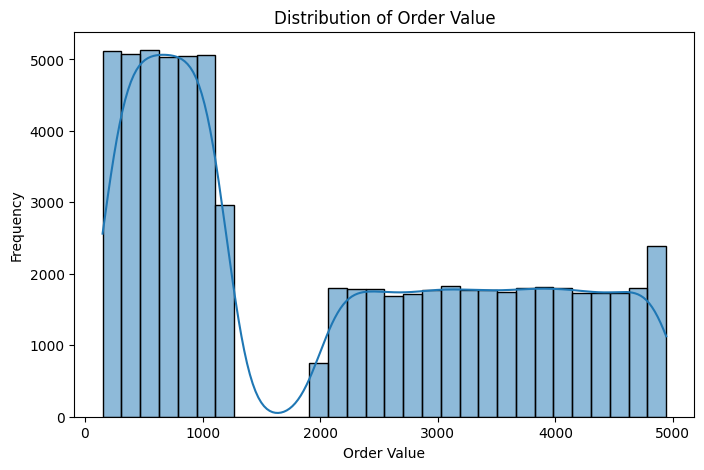

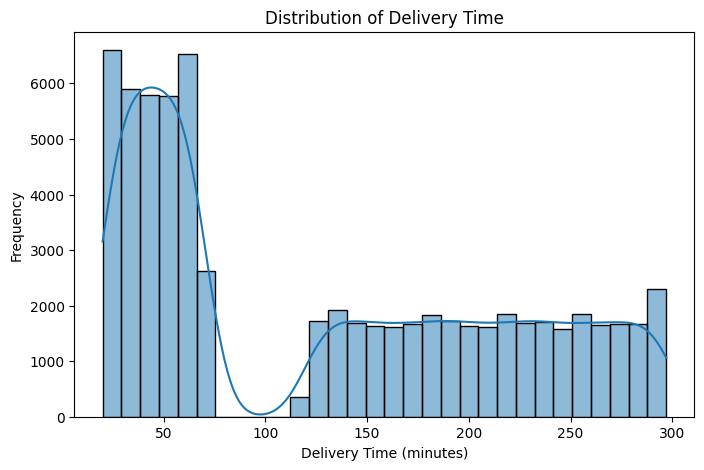

In [ ]:
# step 4 : EDA - Exploratory Data Analysis
#Distribution of order values
plt.figure(figsize=(8,5))
sns.histplot(df['Order_Value'], bins=30, kde=True)
plt.title('Distribution of Order Value')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.show()

#delivery time

plt.figure(figsize=(8,5))
sns.histplot(df['Delivery_Time_Min'], bins=30, kde=True)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.show()


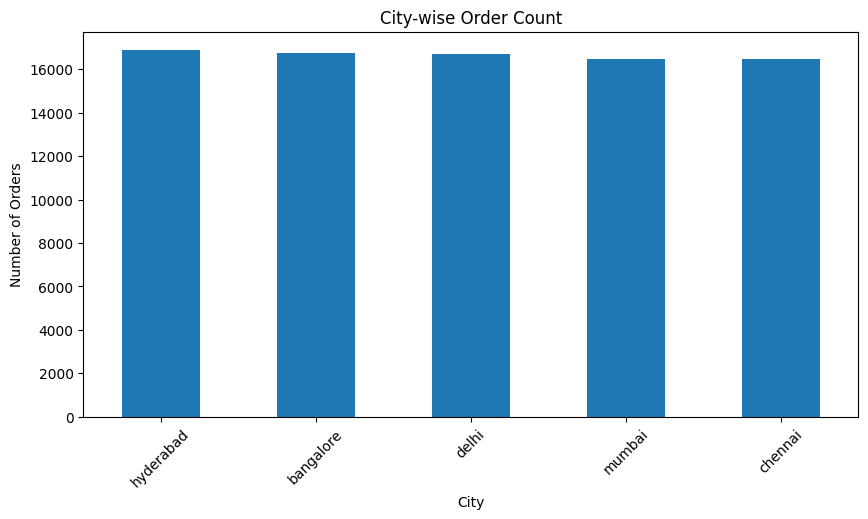

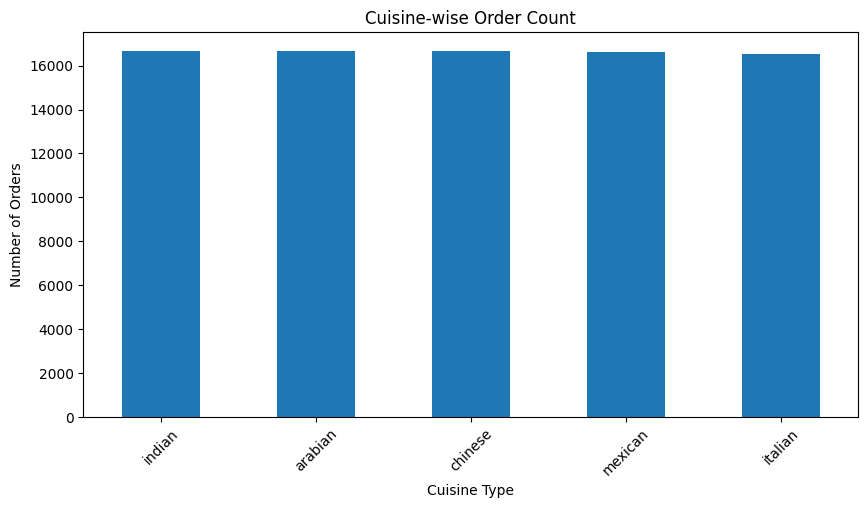

In [ ]:
# City-wise Order Analysis
plt.figure(figsize=(10,5))
df['City'].value_counts().plot(kind='bar')
plt.title('City-wise Order Count')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

#Cuisine-wise Order Analysis
plt.figure(figsize=(10,5))
df['Cuisine_Type'].value_counts().plot(kind='bar')
plt.title('Cuisine-wise Order Count')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()



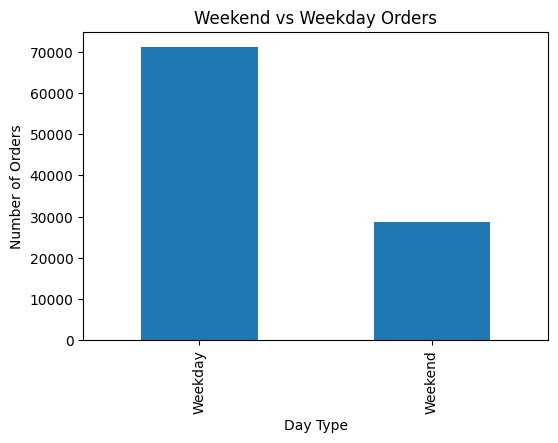

In [ ]:
#Weekend vs Weekday Demand
plt.figure(figsize=(6,4))
df['Order_Day'].value_counts().plot(kind='bar')
plt.title('Weekend vs Weekday Orders')
plt.xlabel('Day Type')
plt.ylabel('Number of Orders')
plt.show()


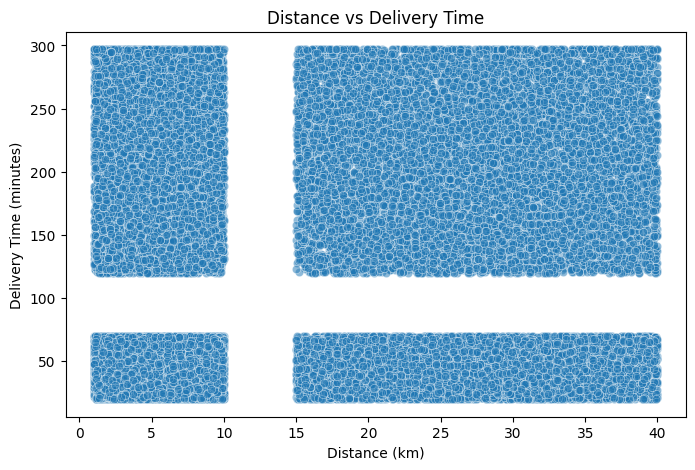

In [ ]:
#Distance vs Delivery Delay Relationship
# delivery time increases with distance
plt.figure(figsize=(8,5))
sns.scatterplot(  # i have tried in lineplot it has taking long time and o/p is not clear
    x='Distance_km',
    y='Delivery_Time_Min',
    data=df,
    alpha=0.5
)
plt.title('Distance vs Delivery Time')
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (minutes)')
plt.show()


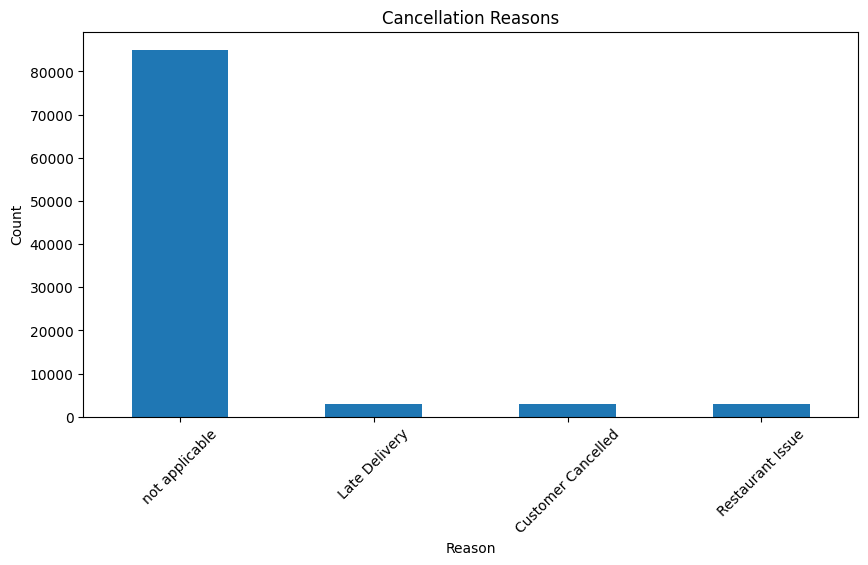

In [ ]:
#Cancellation Reason Analysis (why customer cancel the order & improve service quality)
plt.figure(figsize=(10,5))
df['Cancellation_Reason'].value_counts().plot(kind='bar')
plt.title('Cancellation Reasons')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



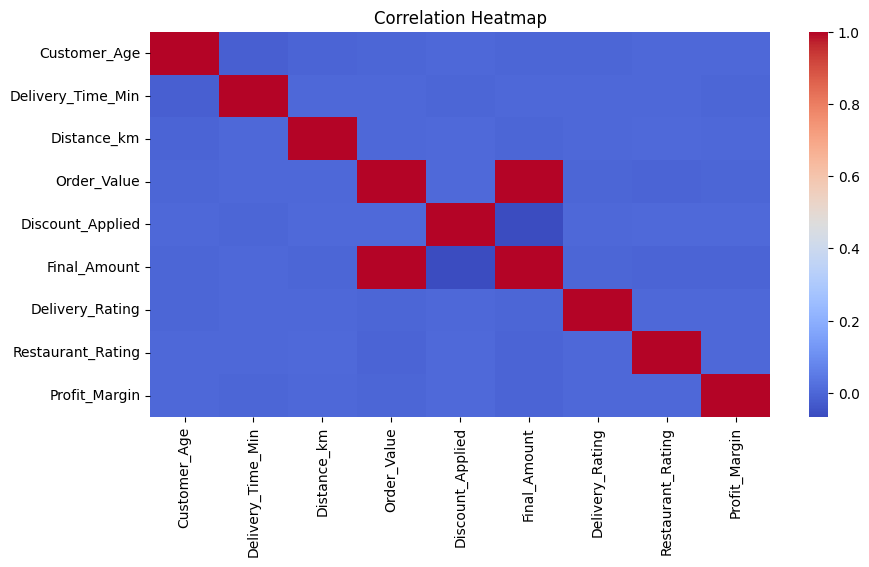

In [ ]:
#Correlation analysis among numeric features.
#Delivery time correlates with distance.
#Profit margin correlates with order value.

plt.figure(figsize=(10,5))
numeric_corr = df.select_dtypes(include='number').corr()

sns.heatmap(
    numeric_corr,
    cmap='coolwarm',
    annot=False
)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# FEATURE ENGINEERING
#Order Day Type (Weekday / Weekend)
# Convert Order_Date to datetime (if not already)
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Order_Day_Type'] = np.where(
    df['Order_Date'].dt.weekday >= 5,
    'Weekend',
    'Weekday'
)
# Convert Order_Time to datetime
df['Order_Time'] = pd.to_datetime(df['Order_Time'], errors='coerce')

# Extract hour
df['Order_Hour'] = df['Order_Time'].dt.hour

# Peak hour flag
df['Peak_Hour'] = np.where(
    (df['Order_Hour'].between(12, 14)) |
    (df['Order_Hour'].between(19, 22)),
    1,
    0
)
df[['Order_Time', 'Order_Hour', 'Peak_Hour']].head(10)

#profit margin
df['Profit_Margin_Percentage'] = (
    df['Profit_Margin'] / df['Order_Value']
) * 100

# delivery performance category
def delivery_performance(time):
    if time <= 30:
        return 'Fast'
    elif time <= 45:
        return 'On Time'
    else:
        return 'Delayed'

df['Delivery_Performance'] = df['Delivery_Time_Min'].apply(delivery_performance)

#customer age grp
age_bins = [18, 25, 35, 45, 60, 100]
age_labels = ['18-25', '26-35', '36-45', '46-60', '60+']

df['Customer_Age_Group'] = pd.cut(
    df['Customer_Age'],
    bins=age_bins,
    labels=age_labels
)

df[
    [
        'Order_Day_Type',
        'Peak_Hour',
        'Profit_Margin_Percentage',
        'Delivery_Performance',
        'Customer_Age_Group'
    ]
].head() # chnge



,Order_Day_Type,Peak_Hour,Profit_Margin_Percentage,Delivery_Performance,Customer_Age_Group
0,Weekend,0,NaN,Delayed,18-25
1,Weekday,0,0.009858,Fast,NaN
2,Weekend,0,0.010568,Delayed,NaN
3,Weekday,0,NaN,Delayed,NaN
4,Weekend,0,0.032258,Delayed,46-60
